In [ ]:
# Import libraries ml 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display first few rows
print("🔹 Dataset Preview:")
df.head()

🔹 Dataset Preview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


🔹 Checking missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 



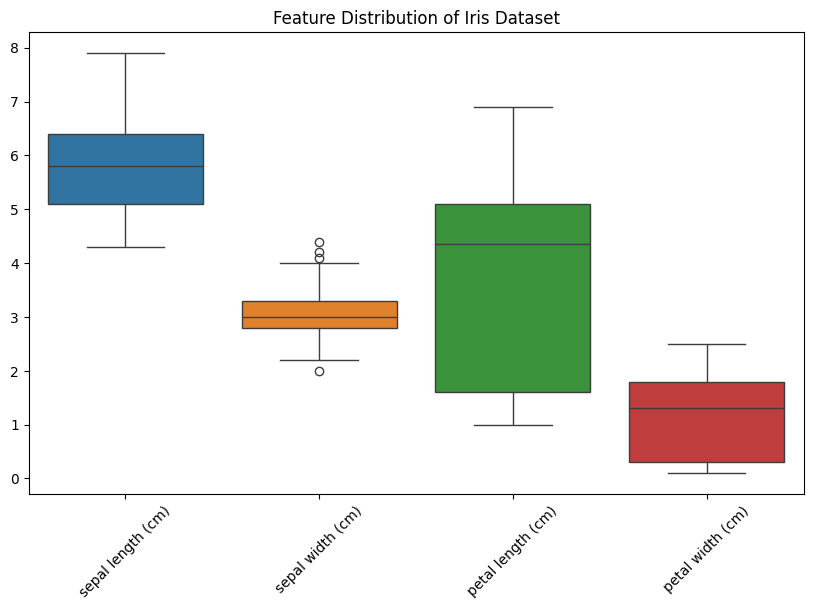

In [4]:
# Check for missing values
print("🔹 Checking missing values:\n", df.isnull().sum(), "\n")

# Visualize feature distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop('target', axis=1))
plt.title("Feature Distribution of Iris Dataset")
plt.xticks(rotation=45)
plt.show()

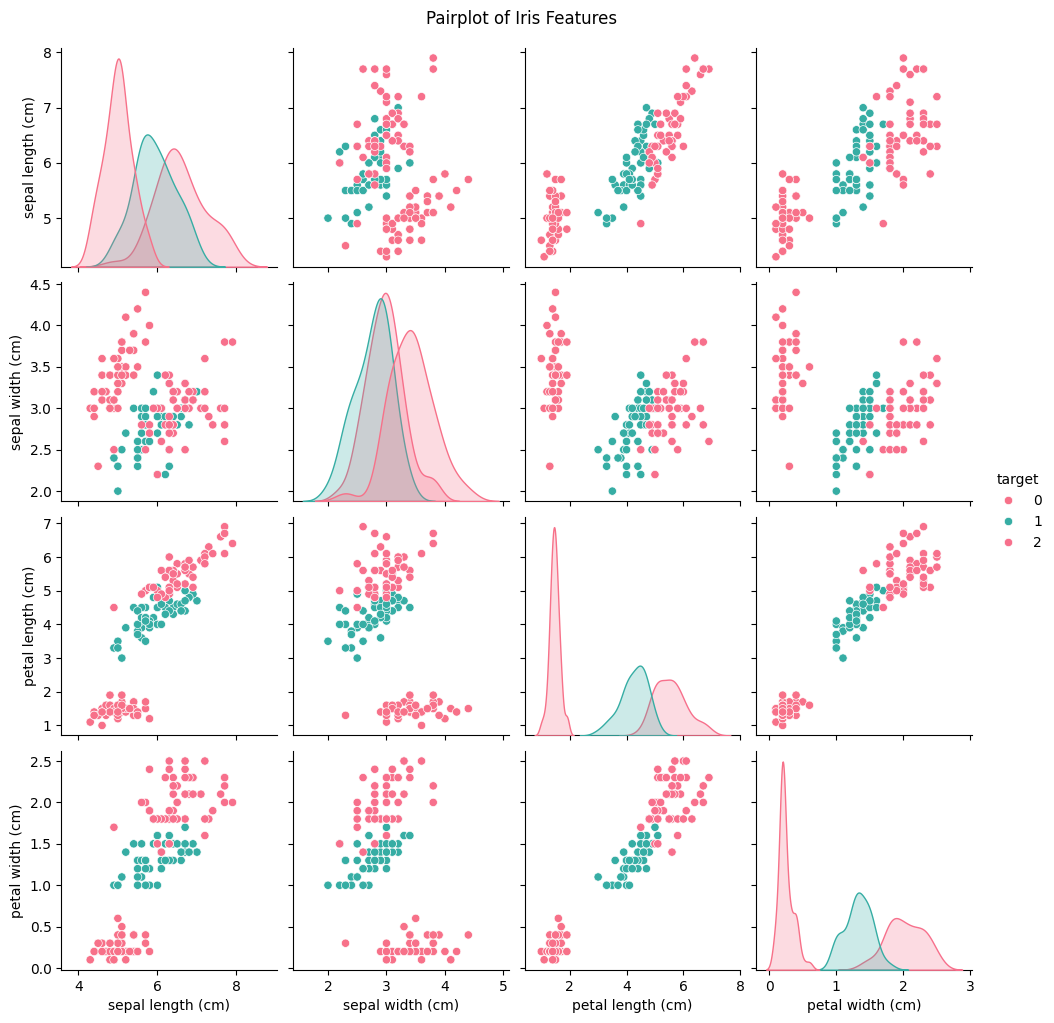

In [5]:
# Pairplot visualization
sns.pairplot(df, hue='target', palette='husl')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [6]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# -------------------- MODEL 1: AdaBoost --------------------
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)

In [8]:
# -------------------- MODEL 2: Gradient Boosting --------------------
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)

In [9]:
# -------------------- MODEL 3: XGBoost --------------------
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

In [10]:
# -------------------- RESULTS COMPARISON --------------------
model_scores = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [ada_acc, gb_acc, xgb_acc]
})

print("🔹 Model Accuracy Comparison:\n")
print(model_scores, "\n")

🔹 Model Accuracy Comparison:

               Model  Accuracy
0           AdaBoost  0.933333
1  Gradient Boosting  0.966667
2            XGBoost  0.933333 



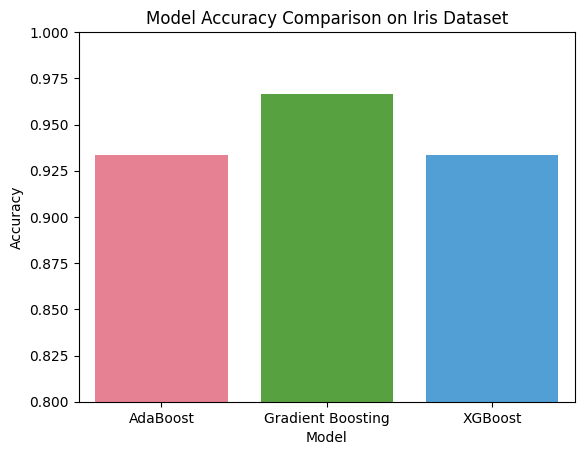

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------- MODEL ACCURACY BARPLOT --------------------
sns.barplot(
    data=model_scores, 
    x='Model', 
    y='Accuracy', 
    hue='Model', 
    palette='husl', 
    legend=False
)
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.ylim(0.8, 1.0)
plt.show()


# -------------------- CONFUSION MATRICES --------------------
models = {
    'AdaBoost': (y_test, y_pred_ada),
    'Gradient Boosting': (y_test, y_pred_gb),
    'XGBoost': (y_test, y_pred_xgb)
}



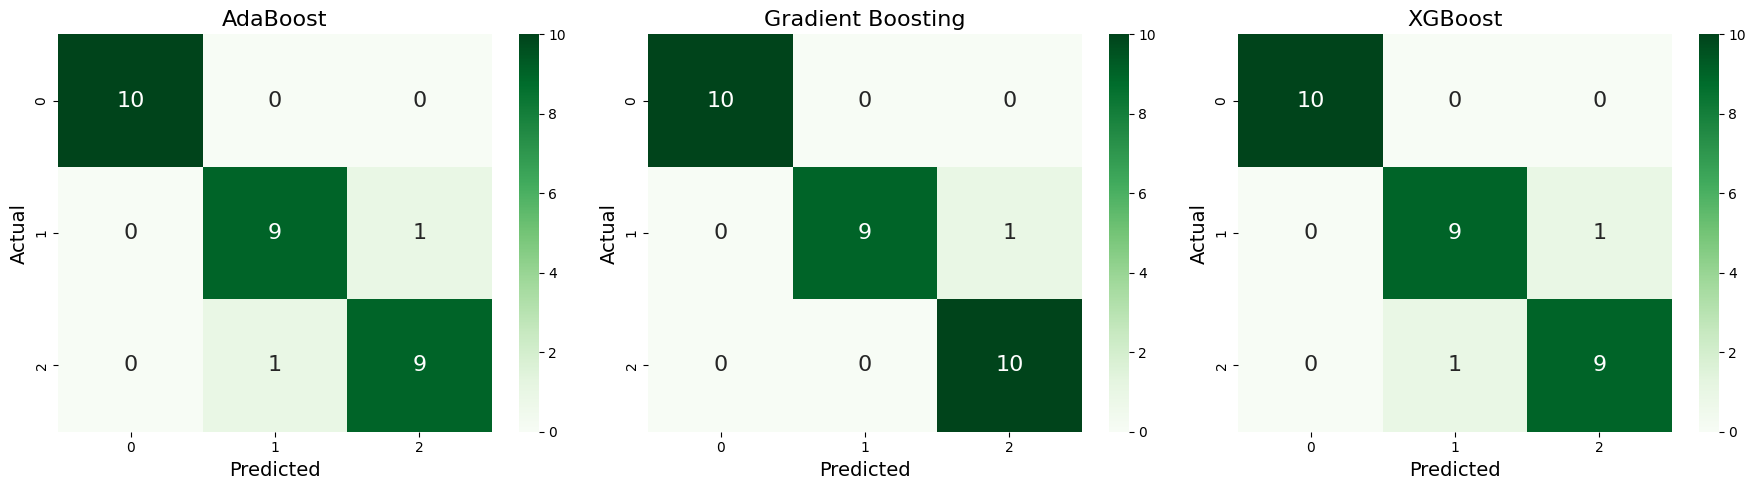

In [42]:
# -------------------- CONFUSION MATRICES IN BIGGER SUBPLOTS --------------------
models = {
    'AdaBoost': (y_test, y_pred_ada),
    'Gradient Boosting': (y_test, y_pred_gb),
    'XGBoost': (y_test, y_pred_xgb)
}

fig, axes = plt.subplots(1, 3, figsize=(18,5))  # bigger figure
for ax, (name, (y_true, y_pred)) in zip(axes, models.items()):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax, annot_kws={"size":16})
    ax.set_title(f'{name}', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)

plt.tight_layout()
plt.show()


In [43]:
# -------------------- CLASSIFICATION REPORTS --------------------
print("🔹 AdaBoost Report:\n", classification_report(y_test, y_pred_ada))
print("🔹 Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))
print("🔹 XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

print("All models trained and compared successfully!")

🔹 AdaBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

🔹 Gradient Boosting Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

🔹 XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
       